# Data Cleaning : Airbnb Listings
In this notebook we are going to deal with data from a well-known residential rental application, Airbnb. Specifically, the data for the Chicago area for 3 months of 2023 (January, February and March).

In [17]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [19]:
# reading the csv files
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")

## Data Cleaning : Listings.csv
1. We drop any entries that are missing (NaN) values.
2. We also drop any entries that are inconsistent such as price with a value of 0.

In [20]:
print(listings_df.shape)
listings_df.info()

(7747, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7747 entries, 0 to 7746
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7747 non-null   int64  
 1   name                            7747 non-null   object 
 2   host_id                         7747 non-null   int64  
 3   host_name                       7747 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7747 non-null   object 
 6   latitude                        7747 non-null   float64
 7   longitude                       7747 non-null   float64
 8   room_type                       7747 non-null   object 
 9   price                           7747 non-null   int64  
 10  minimum_nights                  7747 non-null   int64  
 11  number_of_reviews               7747 non-null   int64  
 12  last_review            

In [21]:
# determine the number of missing entries in each column of Listings.csv
for col in listings_df.columns:
    print (col + ', Number of Missing Values:', len(listings_df[col][listings_df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_name, Number of Missing Values: 0
neighbourhood_group, Number of Missing Values: 7747
neighbourhood, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
last_review, Number of Missing Values: 1493
reviews_per_month, Number of Missing Values: 1493
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0
number_of_reviews_ltm, Number of Missing Values: 0
license, Number of Missing Values: 1174


#### According to the above output, neighbourhood_group, last_review, reviews_per_month, and license columns have missing values.

In [22]:
# Checking whether this column has only null values
if listings_df['neighbourhood_group'].isna().all():
    print("neighbourhood_group has all NaN values")
else:
    print("neighbourhood_group does not have all NaN values")

neighbourhood_group has all NaN values


In [23]:
# As neighbourhood_group has only null values and cannot be replaced with any other values, so this column has to be dropped.
listings_df.drop('neighbourhood_group', axis = 1, inplace = True)
#listings_df.to_csv('listings.csv', index=False)

In [24]:
#Let's check whether there are any listings with price 0.00 (inconsistent values)
print ('Number of Listings with Price $0.00:', len(listings_df[listings_df['price'] == 0.00]))

Number of Listings with Price $0.00: 2


In [25]:
#As there are two listings with price 0.00, let's drop those two listings.
listings_df = listings_df[listings_df['price'] != 0.00]
print ('Number of Listings with Price $0.00:', len(listings_df[listings_df['price'] == 0.00]))

Number of Listings with Price $0.00: 0


In [26]:
# Then, let's drop all the records with null values as the missing values for last_review, reviews_per_month and license columns cannot be replaced with any other values.
listings_df = listings_df.dropna()

In [27]:
for col in listings_df.columns:
    print (col + ', Number of Missing Values:', len(listings_df[col][listings_df[col].isnull()]))

id, Number of Missing Values: 0
name, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_name, Number of Missing Values: 0
neighbourhood, Number of Missing Values: 0
latitude, Number of Missing Values: 0
longitude, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
last_review, Number of Missing Values: 0
reviews_per_month, Number of Missing Values: 0
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0
number_of_reviews_ltm, Number of Missing Values: 0
license, Number of Missing Values: 0


In [28]:
listings_df.shape

(5888, 17)

In [29]:
#listings_df.to_csv('listings_cleaned.csv', encoding = 'utf-8-sig') 

#### Our dataset is now clean and we no longer have any missing values or inconsistent values. We have a total of 5888 records from the original 7747; thus, we've retained a reasonable amount of records. 

## Data Cleaning : Reviews.csv

In [30]:
print(reviews_df.shape)
reviews_df.info()

(345939, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345939 entries, 0 to 345938
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     345939 non-null  int64 
 1   id             345939 non-null  int64 
 2   date           345939 non-null  object
 3   reviewer_id    345939 non-null  int64 
 4   reviewer_name  345939 non-null  object
 5   comments       345847 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.8+ MB


In [31]:
# determine the number of missing entries in each column of reviews.csv
for col in reviews_df.columns:
    print (col + ', Number of Missing Values:', len(reviews_df[col][reviews_df[col].isnull()]))

listing_id, Number of Missing Values: 0
id, Number of Missing Values: 0
date, Number of Missing Values: 0
reviewer_id, Number of Missing Values: 0
reviewer_name, Number of Missing Values: 0
comments, Number of Missing Values: 92


#### According to the above output, only comments column has 92 missing values and these missing values cannot be replaced by any other values. Hence, the rows with missing values has to be dropped.

In [32]:
reviews_df = reviews_df.dropna()
reviews_df.shape

(345847, 6)

In [33]:
for col in reviews_df.columns:
    print (col + ', Number of Missing Values:', len(reviews_df[col][reviews_df[col].isnull()]))

listing_id, Number of Missing Values: 0
id, Number of Missing Values: 0
date, Number of Missing Values: 0
reviewer_id, Number of Missing Values: 0
reviewer_name, Number of Missing Values: 0
comments, Number of Missing Values: 0


In [34]:
#reviews_df.to_csv('reviews_cleaned.csv', encoding = 'utf-8-sig') 

#### Reviews dataset doesn't have any missing values. Hence Reviews dataset has been cleaned successfully.

In [35]:
#Renaming the "id" column name of the listings dataframe so that it has the same name as the "listing_id" column of reviews dataframe.
listings_df = listings_df.rename(columns={'id': 'listing_id'})
listings_df.head()

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,90,3,212,2023-03-04,2.13,1,347,20,R17000015609
1,94450,Comfy Garden Suite in Andersonville,504470,Mark,Edgewater,41.97960,-87.66512,Entire home/apt,65,7,7,2022-12-01,0.88,1,178,7,R22000082956
2,145659,Trendy Roscoe Village 3BR/2BR walk to shops,683529,Joe,North Center,41.94342,-87.68121,Entire home/apt,198,2,59,2022-12-31,0.65,22,330,15,2209272
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,85,2,483,2023-02-26,2.89,1,279,48,R21000075737
4,189821,"Best in Chicago, private, amazing garden space",899757,Meighan,Logan Square,41.92918,-87.70219,Entire home/apt,202,3,598,2023-02-25,4.27,1,207,24,R21000062936


# Modelling


## Importing dataset

Based on the work done during Exploratory Data Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:

- Room Type
- Polarity value
- Number of Reviews

As such, we single out these variables (together with price) to form a new dataframe.

In [36]:
polarity_reviews_df = pd.read_csv("polarity_reviews.csv")
listings_df1 = pd.merge(listings_df, polarity_reviews_df, on='listing_id', how='left')

In [37]:
listings_df1.dropna()
indices_to_keep = ~listings_df1.isin([np.nan, np.inf, -np.inf]).any(axis=1)
listings_df1 = listings_df1[indices_to_keep]

In [38]:
new_listings_df = listings_df1[['room_type','polarity_value','number_of_reviews', 'price']]
new_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328837
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   room_type          328458 non-null  object 
 1   polarity_value     328458 non-null  float64
 2   number_of_reviews  328458 non-null  int64  
 3   price              328458 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.5+ MB


# Exploratory Data Analysis has been conducted in other Python Notebook 
#### Link - https://github.com/CS418/group-project-team-twenty/blob/main/Exploratory%20Data%20Analysis.ipynb

***The three sub problems answered using EDA are:***

***1) What are the features of a listing that influence its price?***

***2) What are the most popular neighbourhoods among Airbnb guests in the area?***

***3) Does review's sentiment affect the price?***

***For the last question Sentiment Analysis is performed and the polarity_value obtained from it is used as one of the attributes for modelling.***

# Regression Models

Regression models are employed to estimate a predicted value by considering independent variables, and they are primarily utilized for identifying the correlation between variables, as well as for prediction and forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.

Predictor Variables: room_type, number_of_reviews, polarity_value

Response Variable: price

The following regression models will be carried out:

- Linear Regression

- Lasso Regression

- Random Forest Regression

### Data Preparation

The following will be done to the data to ensure its fit into the different regression models:

- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [39]:
# One-hot encode the Categorial variables
transformed_df = pd.get_dummies(new_listings_df, columns=['room_type'])

#renaming some categories to remove '/' and blank spaces
new_transformed_df = transformed_df.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
new_transformed_df = new_transformed_df.rename(columns={'room_type_Hotel room': 'room_type_Hotel_room'})
new_transformed_df =new_transformed_df.rename(columns={'room_type_Private room': 'room_type_Private_room'})
new_transformed_df =new_transformed_df.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})

new_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328458 entries, 0 to 328837
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   polarity_value             328458 non-null  float64
 1   number_of_reviews          328458 non-null  int64  
 2   price                      328458 non-null  int64  
 3   room_type_Entire_home_apt  328458 non-null  uint8  
 4   room_type_Hotel_room       328458 non-null  uint8  
 5   room_type_Private_room     328458 non-null  uint8  
 6   room_type_Shared_room      328458 non-null  uint8  
dtypes: float64(1), int64(2), uint8(4)
memory usage: 11.3 MB


In [40]:
# Separating X and y for Modelling
new_transformed_df1 = new_transformed_df.drop('price', axis=1)
x = pd.DataFrame(new_transformed_df1) #Predictor Variables
y = pd.DataFrame(new_transformed_df["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=list(x.columns))
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328458 entries, 0 to 328457
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   polarity_value             328458 non-null  float64
 1   number_of_reviews          328458 non-null  float64
 2   room_type_Entire_home_apt  328458 non-null  float64
 3   room_type_Hotel_room       328458 non-null  float64
 4   room_type_Private_room     328458 non-null  float64
 5   room_type_Shared_room      328458 non-null  float64
dtypes: float64(6)
memory usage: 15.0 MB


In [41]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Model 1: Linear Regression

Linear Regression is a supervised learning algorithm that predicts a dependent variable (in this case, price) based on independent variables (the identified predictors). The algorithm attempts to establish a linear relationship between the variables to make price predictions based on the linear line. In this case, we have trained the model using the following formula:

Price = a * (Predictor Variables) + b

While this is a general formula, we have multiple predictor variables, meaning that there will be more than one coefficient, with one for each predictor variable.

In [42]:
# Creating and fitting the model
linear_reg = LinearRegression()     
linear_reg.fit(x_train, y_train)

LinearRegression()

In [43]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linear_reg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linear_reg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [168.85703344]

                  Predictors  Coefficients
0             polarity_value  8.066274e+00
1          number_of_reviews -2.172614e+01
2  room_type_Entire_home_apt  8.123694e+14
3       room_type_Hotel_room  2.856653e+14
4     room_type_Private_room  7.757347e+14
5      room_type_Shared_room  1.616330e+14



**Note that:** A positive coefficient indicates that as the predictor variable increases, the response variable also increases. A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [44]:
# Predict Response corresponding to Predictors
train_prediction_LR = linear_reg.predict(x_train)
test_prediction_LR = linear_reg.predict(x_test)

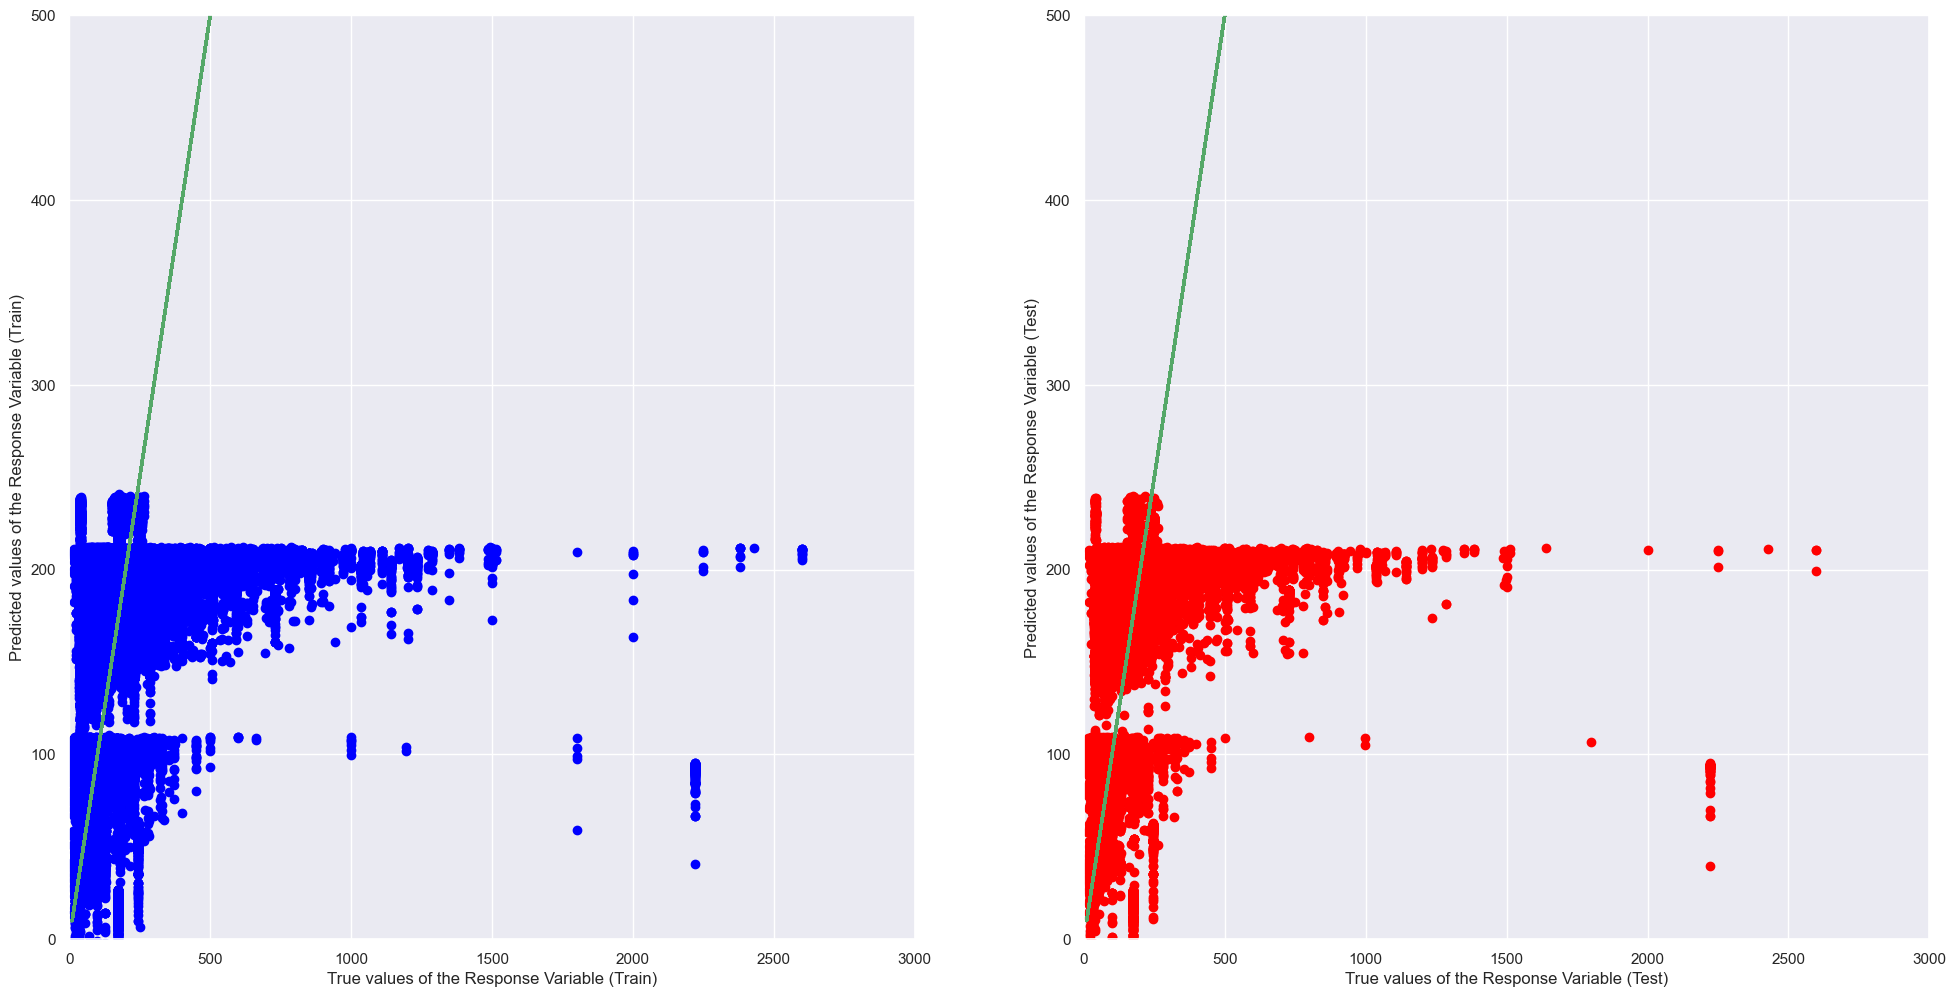

In [45]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_prediction_LR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, test_prediction_LR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])
plt.show()

**Note:** Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 2: Lasso Regression

Lasso Regression is an improved version of linear regression that can be applied to both Regression and Classification problems. It can also be utilized for feature selection, where certain predictors are eliminated after a specified lambda threshold is reached. In addition, Lasso Regression requires iterative testing of different λ values to determine the optimal fit.

In [46]:
#numpy array used for plotting Lasso Regression later on
var_array = np.array(["polarity_value","number_of_reviews","room_type_Entire_home_apt","room_type_Hotel_room",
                              "room_type_Private_room", "room_type_Shared_room"])

In [47]:
#initialising the model
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(x_train, y_train)
#stores prediction
lasso_train_pred = []
lasso_test_pred = []
lasso_r2_score=[] #stores R2 value

lasso_df = pd.DataFrame({'variable': var_array, 'estimate': lasso_reg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for i,alpha in enumerate(lambdas):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_train, y_train)
    var_name = 'estimate'+ str(i+1)
    lasso_df = pd.concat([lasso_df, pd.DataFrame(lasso_reg.coef_.ravel(), columns=[var_name], index=lasso_df.index)], axis=1)
    #prediction
    lasso_train_pred.append(lasso_reg.predict(x_train))
    lasso_test_pred.append(lasso_reg.predict(x_test))
    #storing the r2 score 
    lasso_r2_score.append(lasso_reg.score(x_train,y_train))


best_lasso_r2 = max(lasso_r2_score)
print("The highest R2 value: ",best_lasso_r2)


#Using the best fit Lasso Regression Model's predictions
train_prediction_lasso = lasso_train_pred[lasso_r2_score.index(best_lasso_r2)]
test_prediction_lasso = lasso_test_pred[lasso_r2_score.index(best_lasso_r2)]

lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lasso_df.head()

The highest R2 value:  0.001095169639097393


variable,1,polarity_value,number_of_reviews,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,estimate,7.036182,-19.534341,0.000000,1.804666,-40.974262,-12.507787
1,estimate1,8.055981,-22.156638,39.574489,18.311282,-4.046391,-5.647615
2,estimate2,8.035415,-22.104127,33.877720,16.256318,-9.468775,-6.760589
3,estimate3,8.014842,-22.051438,30.063793,14.863338,-13.093227,-7.498941
4,estimate4,7.994269,-21.998749,26.249867,13.470359,-16.717679,-8.237293


(0.0, 500.0)

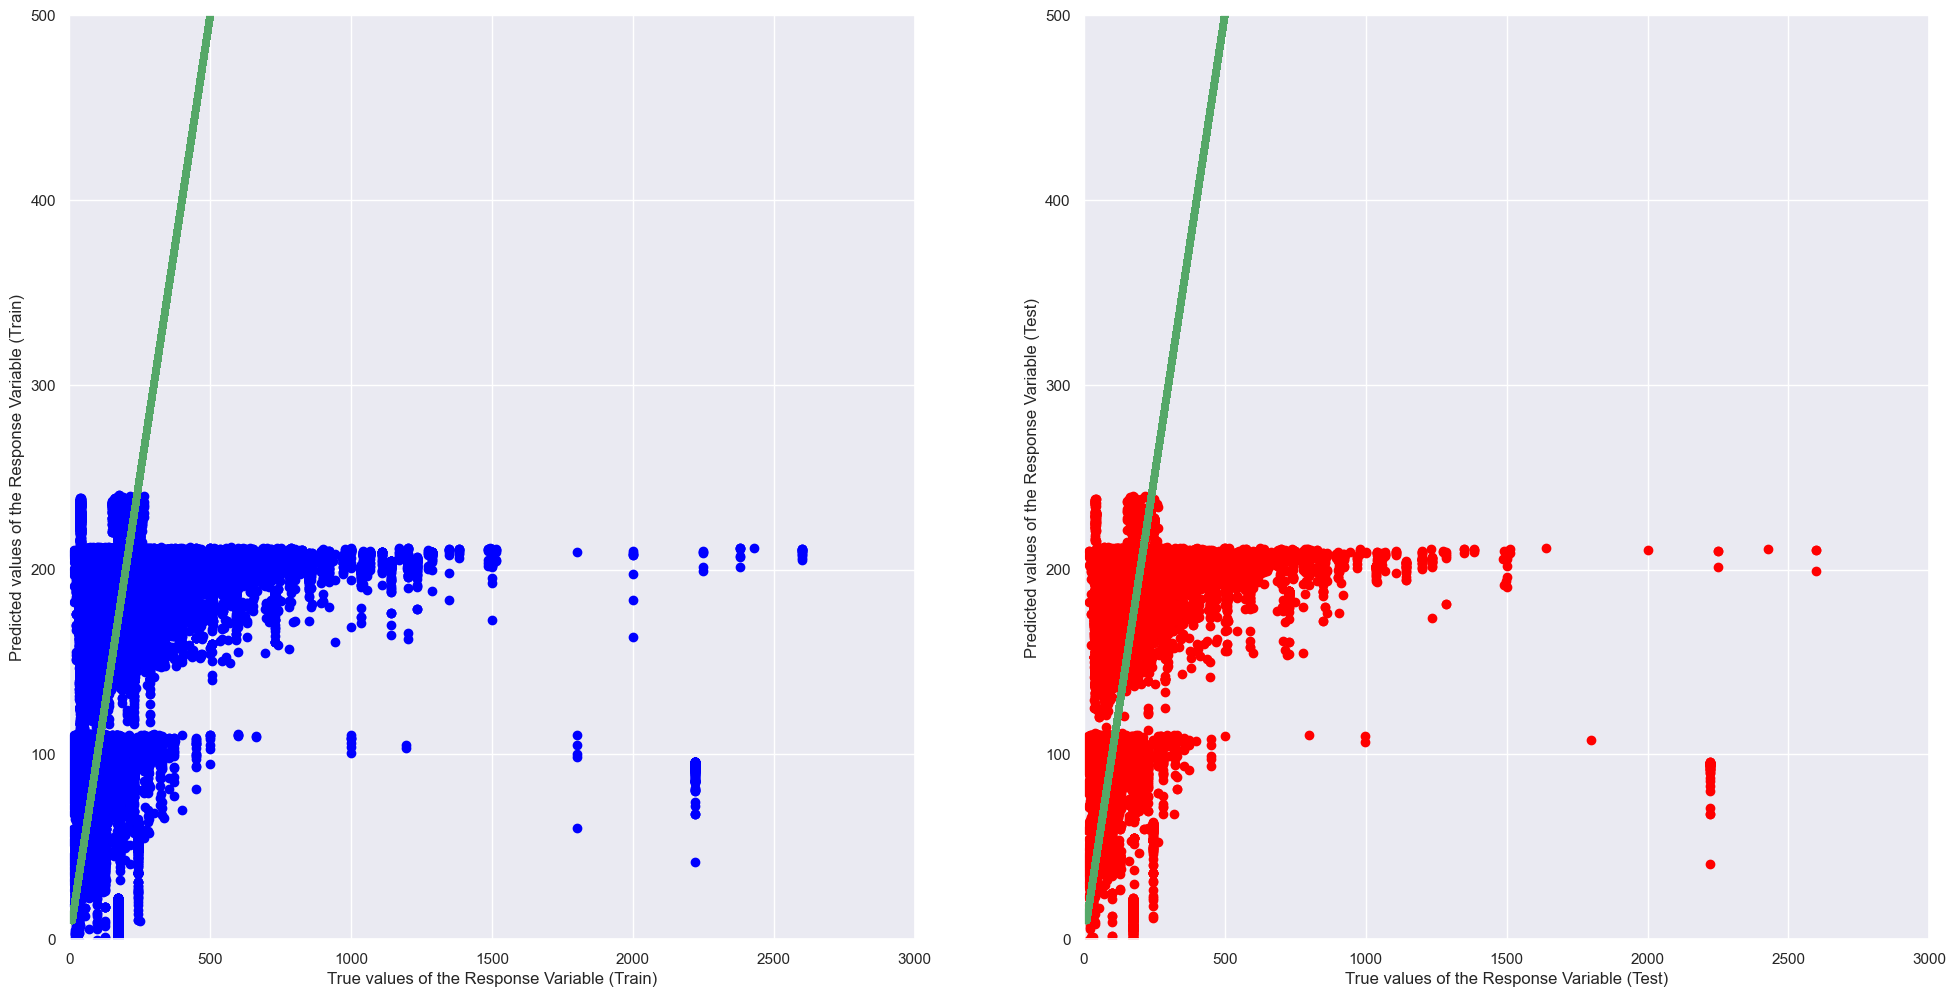

In [48]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_prediction_lasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, test_prediction_lasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])

**Note**: Points that lie on or near the diagonal line means that the values predicted by the Lasso Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 3 : Random Forest Regression

The Random Forest algorithm is an ensemble technique that can be used for both Regression and Classification tasks. It accomplishes this by utilizing multiple decision trees and a technique called Bootstrap Aggregation. Instead of relying on a single decision tree for its predictions, the algorithm combines the predictions of multiple decision trees to increase accuracy and robustness.

Here, we use the RandomForestRegressor to help predict the price

In [49]:
# Creating and fitting the model
r_forest = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5)
r_forest.fit(x_train,y_train.values.ravel())
# Predicting the training and testing sets
train_prediction_rf = r_forest.predict(x_train)
test_prediction_rf =r_forest.predict(x_test)

In [50]:
imp_rf = r_forest.feature_importances_
feature_imp1 = pd.DataFrame(imp_rf, columns=['Weight'], index=x_train.columns)
feature_imp1.sort_values('Weight', inplace=True)
feature_imp1

,Weight
room_type_Shared_room,0.000007
room_type_Hotel_room,0.000437
room_type_Private_room,0.006712
room_type_Entire_home_apt,0.039007
number_of_reviews,0.173289
polarity_value,0.780548


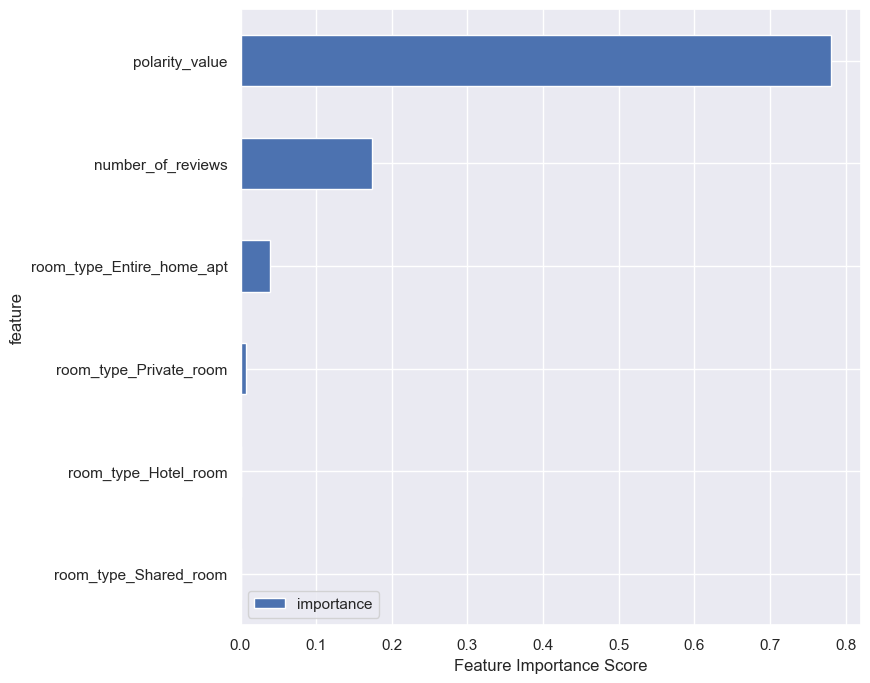

In [51]:
feature_imp = pd.DataFrame({'importance':r_forest.feature_importances_})  
feature_imp['feature'] = x_train.columns
feature_imp.sort_values(by='importance', ascending=False, inplace=True)

feature_imp.sort_values(by='importance', inplace=True)
feature_imp = feature_imp.set_index('feature', drop=True)
feature_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

From the above bar graph, we can infer that polarity_value is the most important feature in price prediction.

(0.0, 500.0)

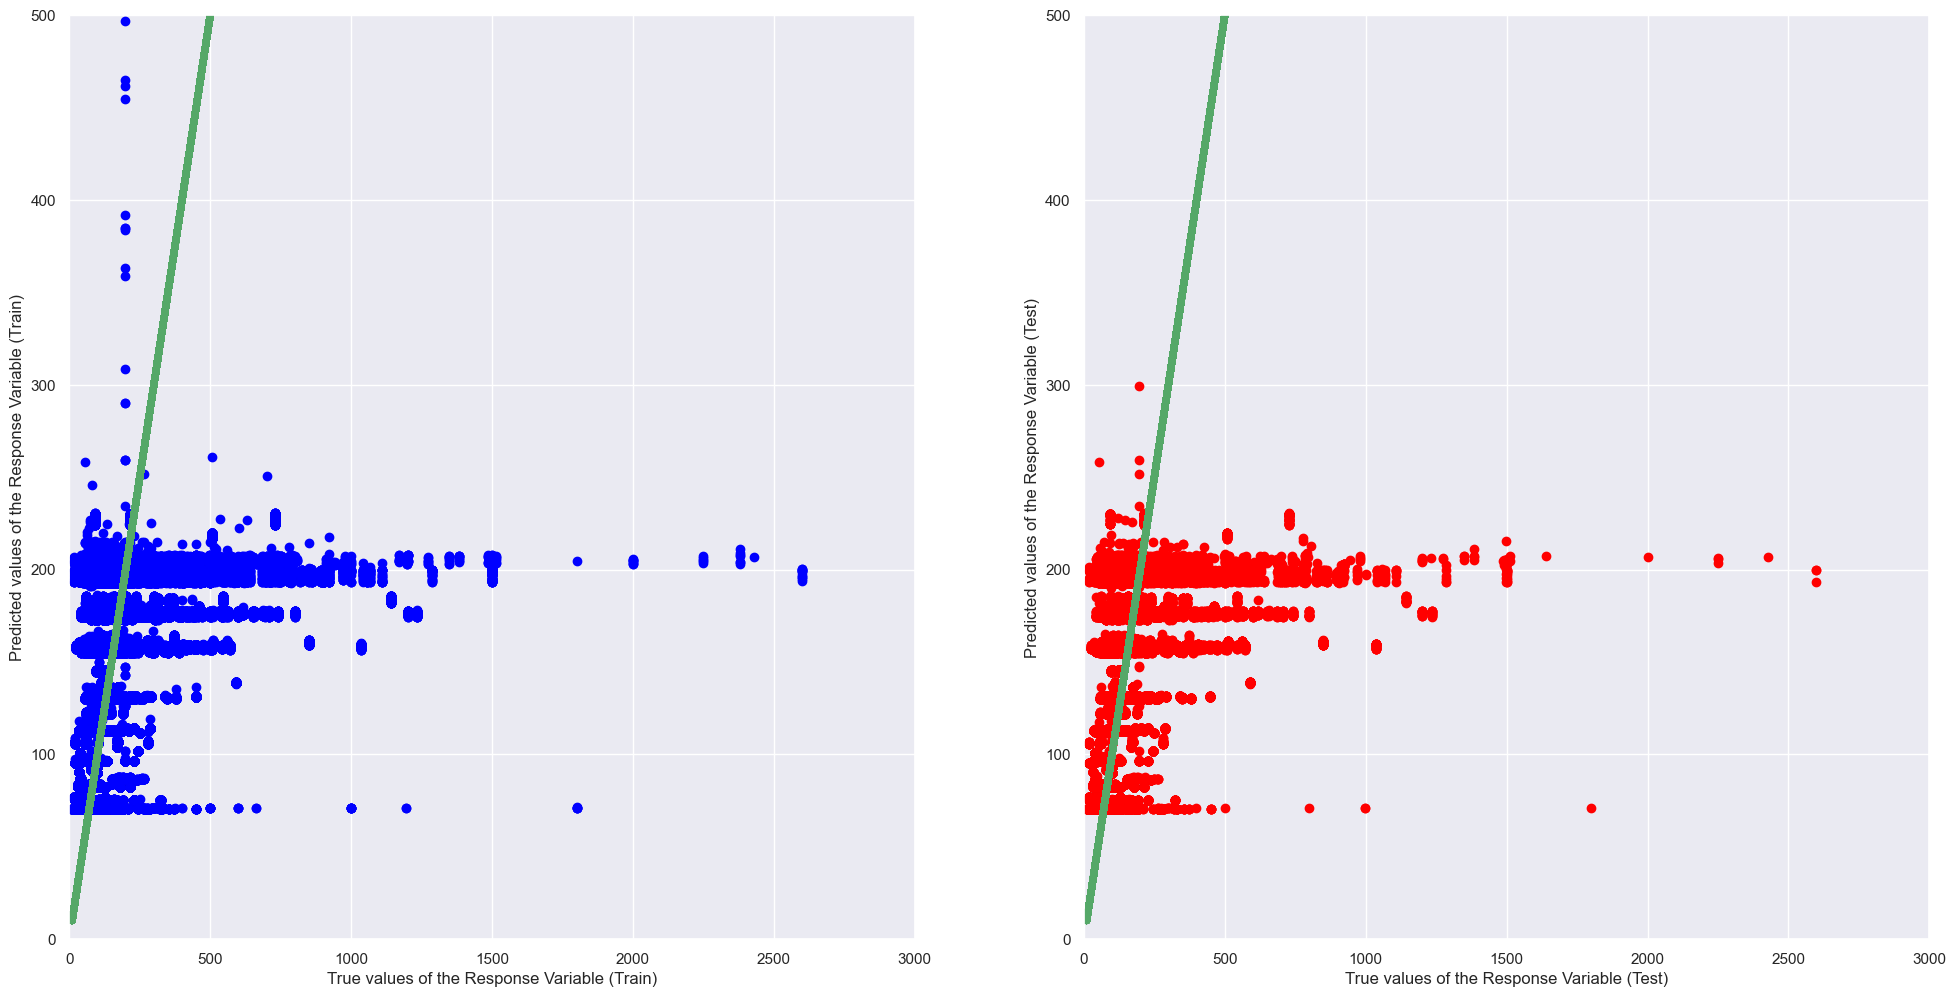

In [52]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, train_prediction_rf, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_xlim([0, 3000])
axes[0].set_ylim([0, 500])
axes[1].scatter(y_test, test_prediction_rf, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlim([0, 3000])
axes[1].set_ylim([0, 500])

**Note:** Points that lie on or near the diagonal line means that the values predicted by the Random Forest Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Evaluation of Models

#### Train Test Split

Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%.

In [53]:
list_of_mse = list()
list_of_r2 = list()
list_of_r2_train = list()
list_of_models=['Linear Regression','Lasso Regression','Randon Forest Regression']

In [54]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
list_of_mse.append(round(mean_squared_error(y_test, test_prediction_LR),4))
list_of_r2.append(round(r2_score(y_test, test_prediction_LR),4))
print("Linear Regression (MSE):", round(mean_squared_error(y_test, test_prediction_LR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, test_prediction_LR),4))
list_of_mse.append(round(mean_squared_error(y_test, test_prediction_lasso),4))
list_of_r2.append(round(r2_score(y_test, test_prediction_lasso),4))
print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, test_prediction_lasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, test_prediction_lasso),4))
list_of_mse.append(round(mean_squared_error(y_test, test_prediction_rf),4))
list_of_r2.append(round(r2_score(y_test, test_prediction_rf),4))
print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, test_prediction_rf),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, test_prediction_rf),4))
print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
list_of_r2_train.append(round(r2_score(y_train, train_prediction_LR),4))
print("Linear Regression (R^2):", round(r2_score(y_train, train_prediction_LR),4))
list_of_r2_train.append(round(r2_score(y_train, train_prediction_lasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, train_prediction_lasso),4))
list_of_r2_train.append(round(r2_score(y_train, train_prediction_rf),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, train_prediction_rf),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 1473213.2921
Linear Regression (R^2): 0.0013

Lasso Regression (MSE): 1473211.4063
Lasso Regression (R^2): 0.0013

Random Forest Regression (MSE): 1552578.8994
Random Forest Regression (R^2): -0.0525


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.0011
Lasso Regression (R^2): 0.0011
Random Forest Regression (R^2): 0.2891


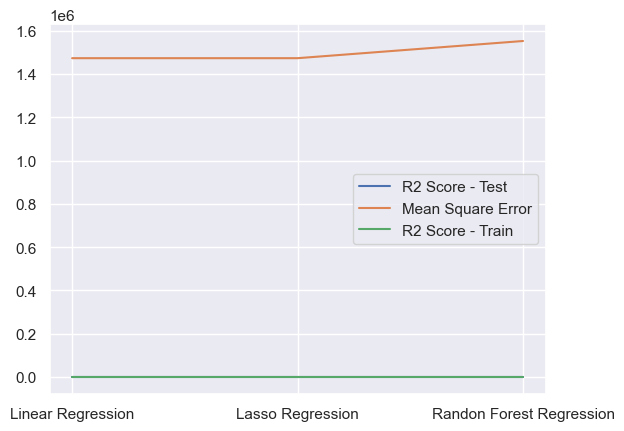

In [55]:
plt.plot(list_of_models, list_of_r2, label='R2 Score - Test')
plt.plot(list_of_models, list_of_mse, label='Mean Square Error')
plt.plot(list_of_models, list_of_r2_train, label = 'R2 Score - Train')
plt.legend()

### The Most Important Feature of a Listing

After evaluating several models, we have determined that Random Forest Regression performs the best at predicting prices compared to other models. We proceed to analyze which feature is most important for this task by using a technique called TreeInterpreter. 

This method decomposes the Random Forest prediction into a sum of contributions from each feature, where a positive contribution indicates a positive impact and a negative contribution indicates a negative impact. 

(Prediction = Bias + Feature1 x Contribution1 + … + FeatureN x ContributionN.)

To ensure the reliability of these feature contributions, we verify that the prediction of price is accurate compared to the actual value.

In [70]:
from treeinterpreter import treeinterpreter as ti
import warnings
instance = x.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(r_forest,instance)
warnings.filterwarnings('ignore')

In [71]:
for i in range(len(instance)):
    print("True Value:",trueInstance['price']) 
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i], 
                                 x.columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

True Value: 1235    202
Name: price, dtype: int64

Prediction: [[114.0922398]]

Feature contributions:
-------------------------
number_of_reviews -72.2732
room_type_Entire_home_apt 13.2252
room_type_Private_room 3.6165
polarity_value 0.7389
room_type_Shared_room 0.0027
room_type_Hotel_room 0.0


In the aforementioned example, the predicted value for instance 1235 closely aligns with its true value, indicating a good prediction. Upon analyzing the feature contributions using TreeInterpreter, we observe that having certain amenities such as a room_type_Entire_home_apt is influential in determining the price of the property.

However, the feature 'number_of_reviews' has a negative contribution for this particular instance, despite previous analysis indicating its significance as a predictor. This is because the instance has a bedroom value of 0. Nonetheless, 'number_of_reviews' remains an important feature for property listings, despite its negative contribution in this instance.

### Conclusion
By comparing the R^2 values for the train sets of various regression models, we can determine which model is most accurate in predicting the price of a property based on the variables of room_type, polarity_value and number_of_reviews. In this analysis, the Random Forest Regression model demonstrated the highest accuracy, with the the highest R^2 value.

Furthermore, visualizing the True Values vs. Predicted Values graphs for each model provides a rough indication of their predictive performance. In this case, the graph for the Random Forest Regression model shows a higher concentration of points near the diagonal line, indicating a better fit between the true and predicted values. Therefore, we can confirm that the conclusion that the Random Forest Regression model is the most accurate is valid.

### Answering the research problem

Based on the analysis conducted, we can confidently identify the factors that contribute to a property's high price. Aspiring AirBnb hosts in Chicago looking to maximize the price of their listing should prioritize the room type. Conversely, travelers looking to minimize their expenses may want to avoid listings with these features.

Other conclusions drawn are:
- Entire properties listed instead of just a single room fetch the highest prices.
- The reviews a listing gets (quality or quantity) does not have much of an impact in its price.
- The polarity_value influences the price of a listing, which means that the review's sentiment positively affects the price of a listing.

## Classification Models

Classification models are machine learning algorithms used to predict the categorical class of a given input based on a set of features or variables. The goal is to learn from a labeled dataset and then use that learning to predict the correct class label for new, unseen data.

The following classification models will be carried out:
- Logistic Regression
- Decision Trees
- Random Forest Classifier

### Model 1: Logistic Regression

Logistic regression is a statistical model used to analyze the relationship between a binary dependent variable (such as yes/no, true/false, etc.) and one or more independent variables, by estimating probabilities using a logistic function. It is commonly used for classification tasks where the outcome variable is a discrete binary value.

Here we are using it to predict the sentiment label : positive or negative

In [58]:
polarity_reviews_df = pd.read_csv("polarity_reviews.csv")
listings_df = pd.merge(listings_df, polarity_reviews_df, on='listing_id', how='left')

In [67]:
# Create a binary target variable 'sentiment_label' based on the compound score
listings_df['sentiment_label'] = np.where(listings_df['compound'] >= 0, 'positive', 'negative')

# Selecting relevant columns
features = listings_df[['number_of_reviews', 'price']]
target = listings_df['sentiment_label']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[    0  1414]
 [    0 64400]]

Classification Report:


C:\Users\Rakshitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakshitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1414
    positive       0.98      1.00      0.99     64400

    accuracy                           0.98     65814
   macro avg       0.49      0.50      0.49     65814
weighted avg       0.96      0.98      0.97     65814


Accuracy Score:
0.9785152095298872


C:\Users\Rakshitha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***The code above produced warnings in the output, but not errors.***

The results of the Logistic Regression show that the model performs quite well in predicting the sentiment labels (positive or negative) using the number of reviews and price as features. The overall accuracy is 97.85%.

However, it's important to note that the classification report indicates a significant difference in performance between the two classes. The model has a high precision, recall, and f1-score for the positive class, but these metrics are much lower (nearly zero) for the negative class. This could be due to the imbalance between the two classes in the dataset.

### Model 2 : Decision Trees

Decision trees are a type of supervised learning algorithm used for both classification and regression tasks. They work by recursively splitting the input data into subsets based on the values of the input features. The goal is to create a tree-like structure where each split maximizes the homogeneity of the target variable within each subset. A decision tree classifier can help identify the most important features that affect the sentiment of the listings. By analyzing the structure of the decision tree, you can gain insights into how the features interact with each other and how they contribute to the prediction of the sentiment label. This information can be valuable for hosts in understanding what factors might lead to positive or negative sentiment and for guests in identifying potential issues that might impact their experience.

Here, a decision tree can be used to predict the sentiment label ('positive' or 'negative') based on the features such as 'number_of_reviews' and 'price'. The algorithm will learn the best splits of the data based on these features to accurately predict the sentiment label.

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree model
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   32  1382]
 [   40 64360]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.44      0.02      0.04      1414
    positive       0.98      1.00      0.99     64400

    accuracy                           0.98     65814
   macro avg       0.71      0.51      0.52     65814
weighted avg       0.97      0.98      0.97     65814


Accuracy Score:
0.9783936548454736


The results of the Decision Tree Classifier show that the model performs quite well in predicting the sentiment labels (positive or negative) using the number of reviews and price as features. The overall accuracy is 97.84%.

However, it's important to note that the classification report indicates a significant difference in performance between the two classes. The model has a high precision, recall, and f1-score for the positive class, but these metrics are much lower for the negative class. This could be due to the imbalance between the two classes in the dataset.

### Model 3: Random Forest Classifier
Random Forest Classifier is an ensemble learning method used for both classification and regression tasks. It works by constructing multiple decision trees during the training phase and outputting the class that is the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

Here the Random Forest Classifier can be used to predict the sentiment label ('positive' or 'negative') based on features like 'number_of_reviews' and 'price'. The algorithm will learn multiple decision trees and combine their predictions to improve the overall accuracy and stability of the model.

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[   28  1386]
 [   22 64378]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.56      0.02      0.04      1414
    positive       0.98      1.00      0.99     64400

    accuracy                           0.98     65814
   macro avg       0.77      0.51      0.51     65814
weighted avg       0.97      0.98      0.97     65814


Accuracy Score:
0.9786063755431975


The results of the Random Forest Classifier show that the model performs well in predicting the sentiment labels (positive or negative) using the number of reviews and price as features. The overall accuracy is 97.86%.

Similar to the Decision Tree Classifier, the classification report indicates a significant difference in performance between the two classes. The model has a high precision, recall, and f1-score for the positive class, but these metrics are much lower for the negative class. This could be due to the imbalance between the two classes in the dataset.

### Visualization

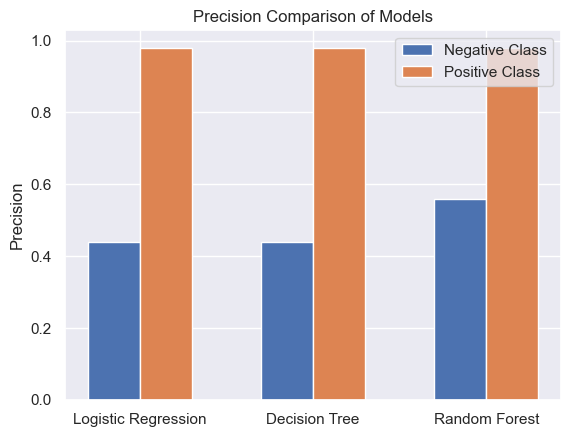

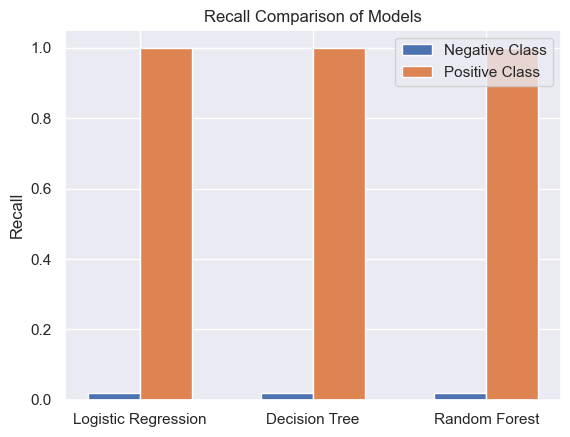

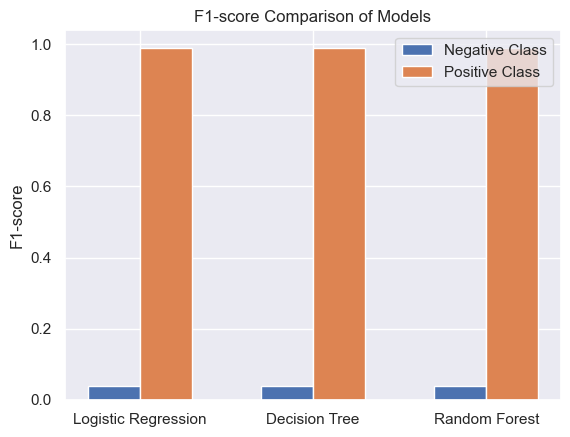

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Store the classification reports as dictionaries
log_reg_report = {'negative': {'precision': 0.44, 'recall': 0.02, 'f1-score': 0.04},
                  'positive': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99}}

decision_tree_report = {'negative': {'precision': 0.44, 'recall': 0.02, 'f1-score': 0.04},
                        'positive': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99}}

random_forest_report = {'negative': {'precision': 0.56, 'recall': 0.02, 'f1-score': 0.04},
                        'positive': {'precision': 0.98, 'recall': 1.00, 'f1-score': 0.99}}

def plot_metric_comparison(models_reports, metric):
    # Extract values for each model
    model_names = list(models_reports.keys())
    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    # Define bar width and positions
    bar_width = 0.3
    neg_positions = np.arange(len(model_names))
    pos_positions = [x + bar_width for x in neg_positions]

    # Create bar plots
    plt.bar(neg_positions, neg_values, width=bar_width, label='Negative Class')
    plt.bar(pos_positions, pos_values, width=bar_width, label='Positive Class')

    # Add x-axis labels and ticks
    plt.xticks([r + bar_width / 2 for r in range(len(model_names))], model_names)

    # Add y-axis label and title
    plt.ylabel(f'{metric.capitalize()}')
    plt.title(f'{metric.capitalize()} Comparison of Models')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

models_reports = {'Logistic Regression': log_reg_report,
                  'Decision Tree': decision_tree_report,
                  'Random Forest': random_forest_report}

plot_metric_comparison(models_reports, 'precision')
plot_metric_comparison(models_reports, 'recall')
plot_metric_comparison(models_reports, 'f1-score')


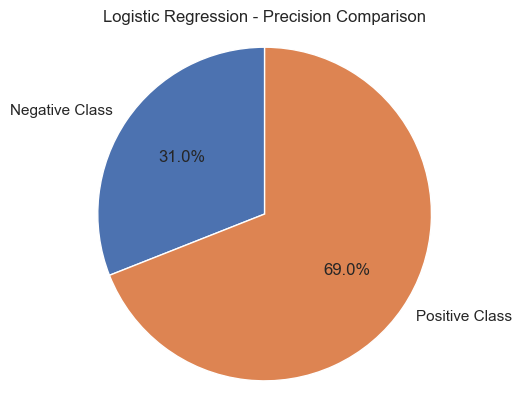

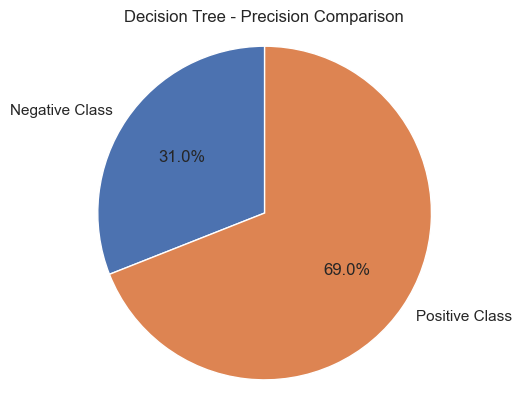

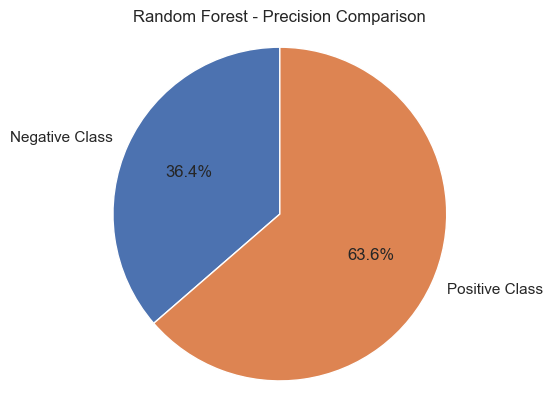

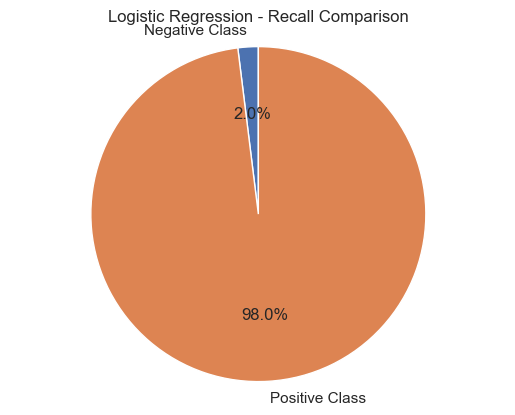

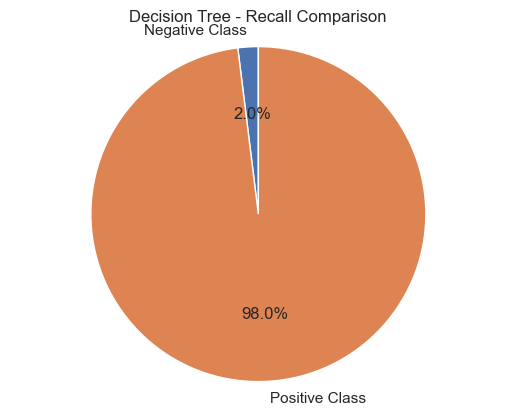

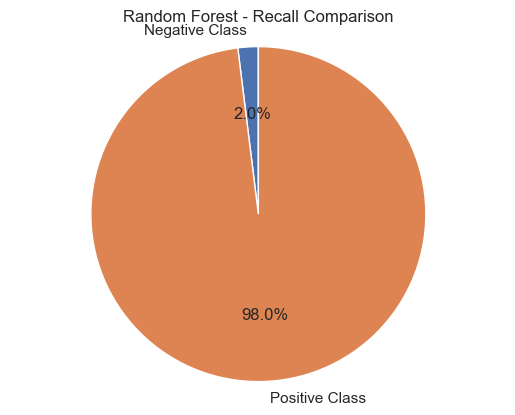

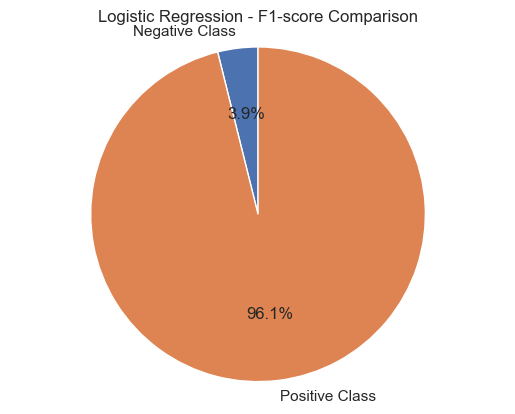

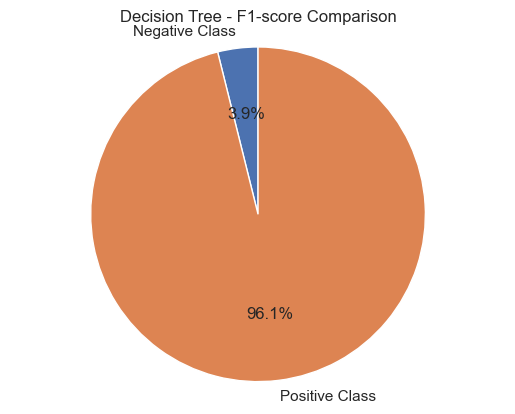

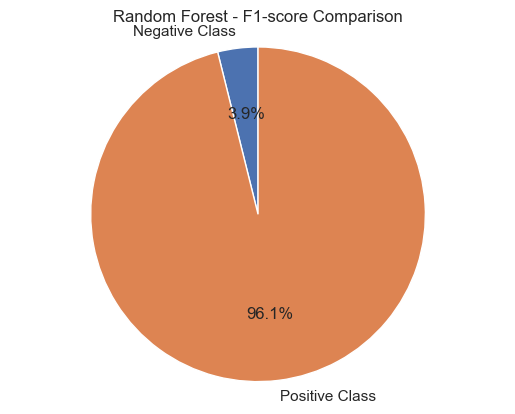

In [63]:
def plot_metric_comparison_pie(models_reports, metric):
    model_names = list(models_reports.keys())
    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    for i, model_name in enumerate(model_names):
        sizes = [neg_values[i], pos_values[i]]
        labels = ['Negative Class', 'Positive Class']
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title(f'{model_name} - {metric.capitalize()} Comparison')
        plt.show()

plot_metric_comparison_pie(models_reports, 'precision')
plot_metric_comparison_pie(models_reports, 'recall')
plot_metric_comparison_pie(models_reports,'f1-score')

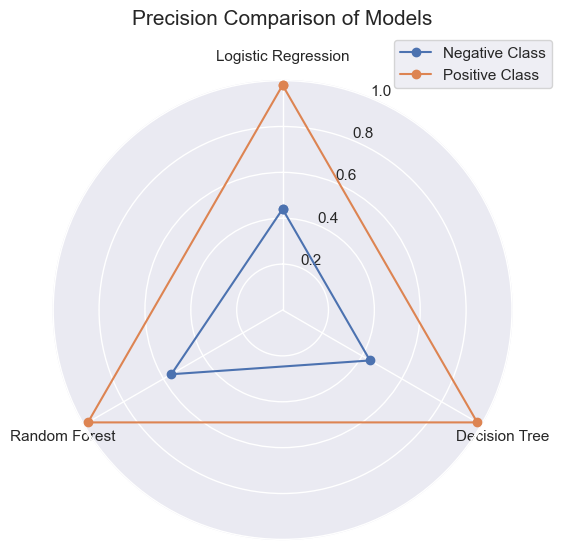

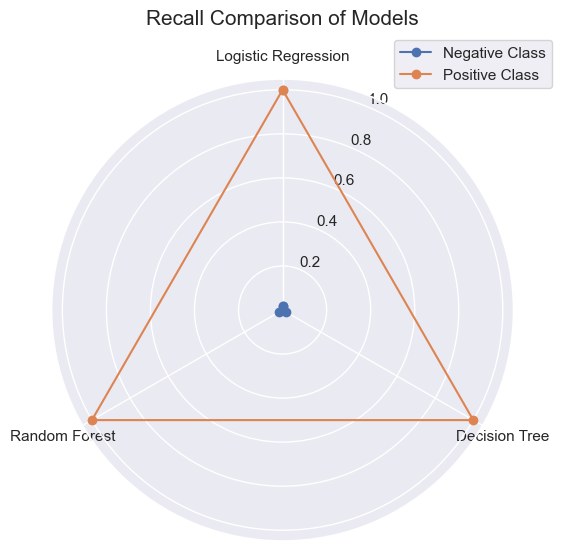

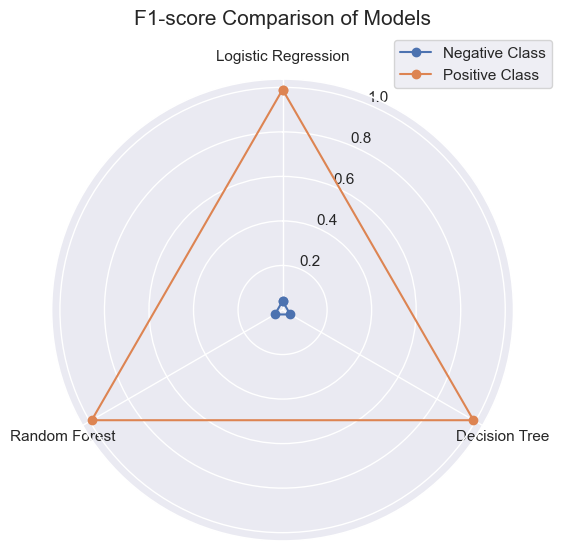

In [64]:
def plot_metric_comparison_radar(models_reports, metric):
    model_names = list(models_reports.keys())
    num_vars = len(model_names)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    neg_values += neg_values[:1]
    pos_values += pos_values[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, neg_values, label='Negative Class', marker='o')
    ax.plot(angles, pos_values, label='Positive Class', marker='o')

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(model_names)

    ax.set_title(f'{metric.capitalize()} Comparison of Models', y=1.1, fontsize=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

plot_metric_comparison_radar(models_reports, 'precision')
plot_metric_comparison_radar(models_reports, 'recall')
plot_metric_comparison_radar(models_reports,'f1-score')

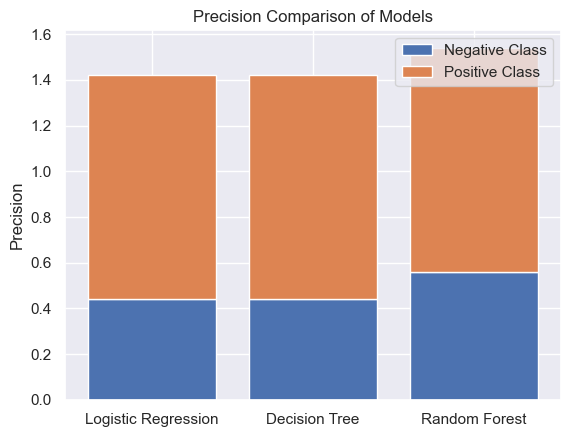

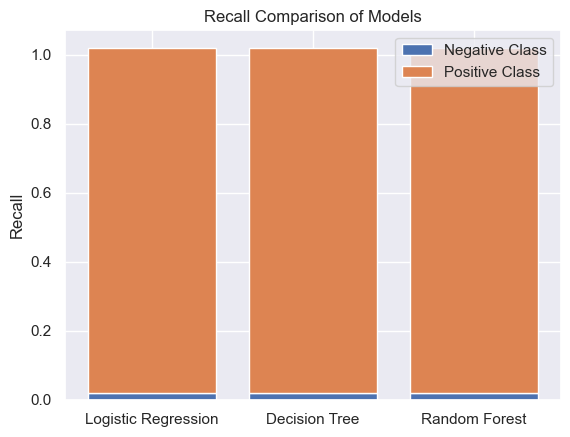

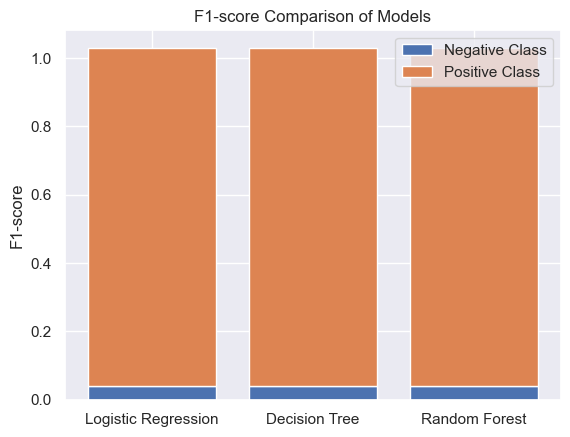

In [65]:
def plot_metric_comparison_stacked_bar(models_reports, metric):
    model_names = list(models_reports.keys())
    neg_values = [report['negative'][metric] for report in models_reports.values()]
    pos_values = [report['positive'][metric] for report in models_reports.values()]

    positions = np.arange(len(model_names))
    plt.bar(positions, neg_values, label='Negative Class')
    plt.bar(positions, pos_values, bottom=neg_values, label='Positive Class')

    plt.xticks(positions, model_names)
    plt.ylabel(f'{metric.capitalize()}')
    plt.title(f'{metric.capitalize()} Comparison of Models')
    plt.legend()
    plt.show()

plot_metric_comparison_stacked_bar(models_reports, 'precision')
plot_metric_comparison_stacked_bar(models_reports, 'recall')
plot_metric_comparison_stacked_bar(models_reports,'f1-score')

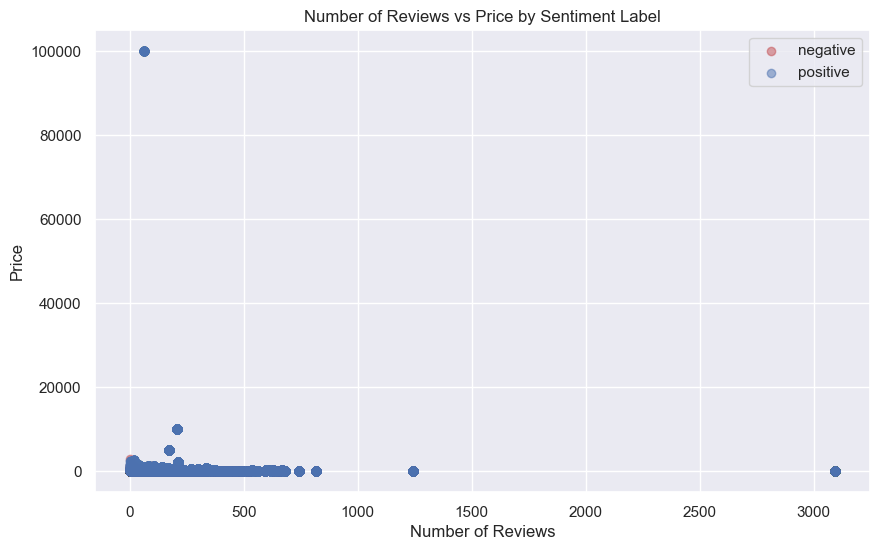

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_reviews_vs_price(features, target):
    df = pd.concat([features, target], axis=1)

    fig, ax = plt.subplots(figsize=(10, 6))

    for label, color in zip(['negative', 'positive'], ['r', 'b']):
        filtered_data = df[df['sentiment_label'] == label]
        ax.scatter(filtered_data['number_of_reviews'], filtered_data['price'], label=label, c=color, alpha=0.5)

    ax.set_xlabel('Number of Reviews')
    ax.set_ylabel('Price')
    ax.set_title('Number of Reviews vs Price by Sentiment Label')
    ax.legend()
    plt.show()

plot_reviews_vs_price(features, target)

### Conclusion
Classification models were built using logistic regression, decision tree, and random forest algorithms. The models aimed to predict the sentiment label (positive or negative) of an Airbnb listing based on the number of reviews and price. The performance metrics indicated that the models could predict positive sentiment labels accurately, but the performance for negative sentiment labels was poor, possibly due to the imbalance in the data.

This classification analysis helps answer the research questions by providing insights into the factors that influence the demand for Airbnb rentals (number of reviews) and their prices. Although the models' predictive power for negative sentiment labels is limited, they can still shed light on the relationship between price, number of reviews, and guest satisfaction.

## CLUSTERING
Clustering can be applied to the Airbnb dataset for various purposes, such as segmenting listings based on their features or identifying patterns in the data. Clustering is an unsupervised learning technique that groups data points based on their similarity. It can provide insights into the structure of the data and reveal previously unknown relationships.

But here, we are using clustering to group Airbnb listings based on features like price, and number of reviews. This can help identify distinct types of listings, such budget, and popular rentals.

### K means Clustering
K-means clustering is an unsupervised learning algorithm that aims to partition a dataset into K distinct clusters (groups) based on the similarity of data points. The goal is to minimize the sum of squared distances between the data points and their corresponding cluster centroids. The algorithm iterates between two main steps until convergence:

Assignment step: Each data point is assigned to the nearest centroid. Update step: The centroids are updated by taking the mean of all data points assigned to that centroid. The quality of the final clustering depends on the initial choice of centroids. One common method to initialize the centroids is the K-means++ algorithm, which selects centroids in a way that spreads them out across the data space.

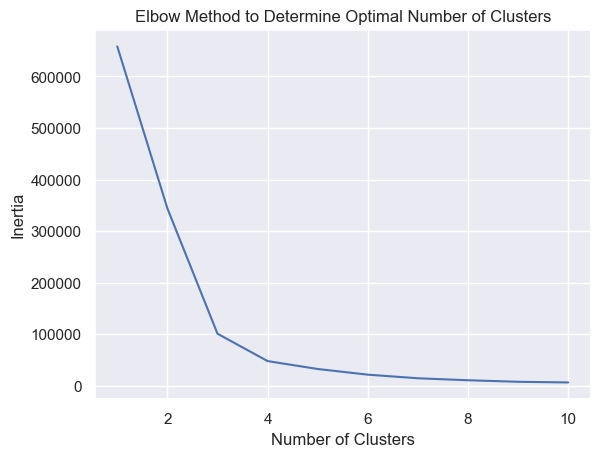

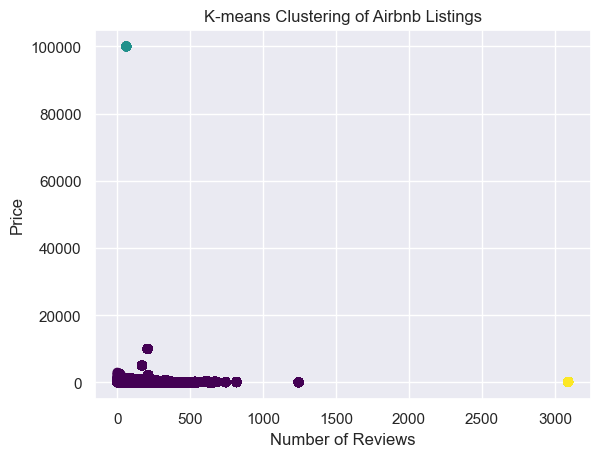

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = listings_df[['number_of_reviews', 'price']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find the optimal number of clusters using the elbow method
inertia = []
cluster_range = range(1, 11)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(cluster_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()
# Fit the K-means clustering model with the optimal number of clusters
optimal_clusters = 3  # Based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
listings_df['cluster'] = clusters

# Visualize the clusters
plt.scatter(listings_df['number_of_reviews'], listings_df['price'], c=listings_df['cluster'], cmap='viridis')
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("K-means Clustering of Airbnb Listings")
plt.show()

***The above are just warnings but not errors , the code has run without any errors! The warnings are due to the default value of the n_init parameter.***

The clustering example provided above, which uses the K-means algorithm on features like "number_of_reviews" and "price," can help answer the problem statement related to the segmentation of Airbnb listings. It can reveal patterns in the data that might not be apparent through other methods of analysis.

How are Airbnb listings distributed based on their price and popularity (number of reviews)?

This information can be valuable for both hosts and guests, as it can help them make informed decisions about listing or booking properties on the platform.

For hosts, understanding the different clusters of Airbnb listings can help them identify gaps in the market, position their properties more effectively, and set competitive prices. For guests, the clustering can assist them in identifying the types of listings that best suit their preferences and budget.

### Conclusion

Using the K-means clustering algorithm, we segmented the Airbnb listings based on their price and popularity (number_of_reviews). This analysis revealed patterns and trends in the data that can inform hosts about the optimal positioning of their properties in the market and help guests identify suitable listings according to their preferences and budget.

The clustering analysis contributes to answering the research questions by providing insights into the distribution of Airbnb listings based on their price and popularity. It helps identify potential market gaps and opportunities for hosts and guides guests in finding the most suitable listings.